In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv("C://Users//Admin//Desktop//New folder//diabetes.csv") 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [10]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [11]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [12]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]


In [13]:
vif

,Features,vif
0,Pregnancies,1.430872
1,Glucose,1.298961
2,BloodPressure,1.181863
3,SkinThickness,1.507432
4,Insulin,1.427536
5,BMI,1.297450
6,DiabetesPedigreeFunction,1.067090
7,Age,1.588368


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.20, random_state = 355)

In [15]:
model = GaussianNB()

In [16]:
model.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred = model.predict(x_test)

In [18]:
print(accuracy_score(y_test, y_pred))

0.7922077922077922


In [19]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[88, 11],
       [21, 34]], dtype=int64)

In [21]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [22]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7922077922077922

In [23]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8888888888888888

In [24]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8073394495412844

In [25]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8461538461538461

In [26]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7535353535353535

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

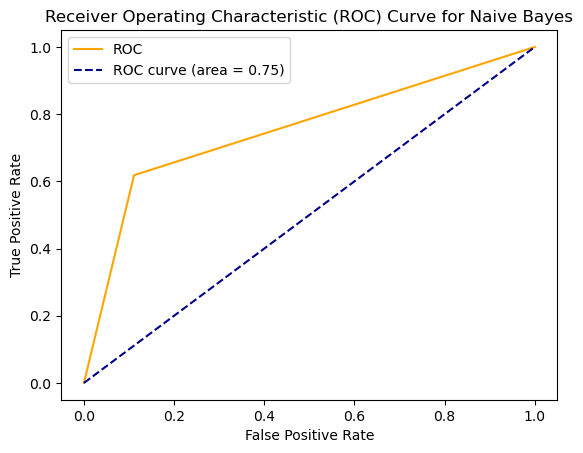

In [31]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()